### Craft Breweries in the U.S., Analysis of factors leading to industry growth

##### Problem Statement:  Craft brewers in the United States have seen unprecedented growth in the past 10 years, to the point that many are questioning if this is a sustainable growth trend or if this is simply a bubble.  By analyzing the factors which led to the increased interest in craft beers, we can determine marketing strategies to sustain that growth.

### Importing Modules

In [30]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sb
import matplotlib as plt
import statsmodels.api as sm
%matplotlib inline
from IPython.display import display, Image

In [31]:
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler

sklearn.preprocessing.data.MinMaxScaler

### Importing CSV Data

In [32]:
brews = pd.read_csv("full_brews.csv")
dogfood = pd.read_csv("Organic Pet Food.csv")
wine = pd.read_csv("Wine Barrels_ts.csv")
coffee = pd.read_csv("Revenue Coffee.csv")
brewery_numbers = pd.read_csv("number_breweries.csv")
cpi_beer = pd.read_csv("cpi_alcohol.csv")
number_drinks = pd.read_csv("number_drinks.csv")
state_income = pd.read_csv("state_income_rows.csv")
regions = pd.read_csv("regions.csv")
wineries = pd.read_csv("Number Wineries.csv")

In [33]:
wineries = wineries.drop('Unnamed: 3',1)

In [34]:
brews = pd.merge(brews, regions)

### Creating Master Data Frame (combining factors)

In [35]:
brewframe = pd.merge(brews, coffee)
brewframe = pd.merge(brewframe, dogfood)
brewframe = pd.merge(brewframe, wine)
brewframe = pd.merge(brewframe, state_income)
brewframe = pd.merge(brewframe, cpi_beer)
brewframe = pd.merge(brewframe, number_drinks)
brewframe = pd.merge(brewframe, wineries)

In [36]:
brewmaster = brewframe
brewmaster.head()

,Date,Brewery Name,State,BBL,Year,Size,Region,Rev_coffee_millions,Pet Food Sales (hundred thousand),Wine Gallons,Income,CPI_urban_alchohol,beer_away_from_home,beer_relative_importance,number_drinks,Wineries
0,1/1/2014,10_barrel_brewing,OR,40000,2014,Large,West,30240,46000,886,51134,213.352,159.134,0.274,4.1,7762
1,1/1/2014,4th_street_brewing,OR,200,2014,Micro,West,30240,46000,886,51134,213.352,159.134,0.274,4.1,7762
2,1/1/2014,alameda_brewing,OR,2893,2014,Medium,West,30240,46000,886,51134,213.352,159.134,0.274,4.1,7762
3,1/1/2014,beer_valley_brewing,OR,2050,2014,Medium,West,30240,46000,886,51134,213.352,159.134,0.274,4.1,7762
4,1/1/2014,bend_brewing,OR,963,2014,Micro,West,30240,46000,886,51134,213.352,159.134,0.274,4.1,7762


### Setting Times Series - Master DF

In [37]:
#data['Date'] = pd.to_datetime(data['Date'])
#data.set_index('Date', inplace=True)
#df['column'].resample('A').mean().plot()

brewmaster['Date'] = pd.to_datetime(brewmaster['Date'])
brewmaster.set_index('Date', inplace = True)

## Time Series Visualization

### Mean production

We can see in the graph below that while there is a notable range in overall production, the mean production for all 'craft breweries' still saw a marked increase from 2008 to 2014.  It is my opinion that this helps to demonstrate why it would be inaccurate to simply dismiss this increase as being the result of better performance on the part of the largest breweries.  It is my theory, rather, that the larger breweries were simply in a better position to capitalize on the growing craft market - they have far more means of production and distribution than new breweries do.  

A new brewery may only be able to sell to customers who come on site, whereas a large brewery can distribute in a grocery store chain.  

However, while this may explain why looking at mean production is useful, it does not allow us to do more in-depth analysis in a causal sense, and so moving forward all regression and hypothesis tests will treat the three types of breweries as their own categories.  

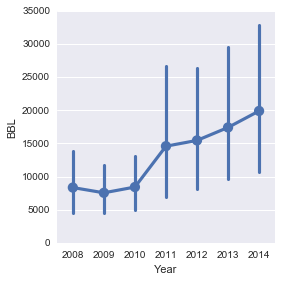

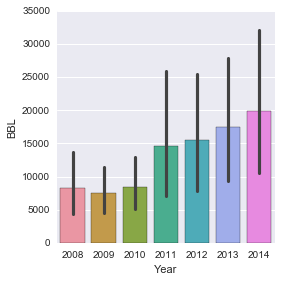

In [38]:
sb.factorplot(x = 'Year', y = 'BBL', data = brews)
sb.factorplot(x = 'Year', y = 'BBL', data = brews, kind = 'bar')

### Dividing breweries into different dataframes based on size

The graph below is comparing the mean production across four groups - mega, large, medium, and micro breweries.  The four are divided by the total number of barrels (BBL) they produced in a given year.  As we can see, it is impossible to compare any sort of jumps in production because of how vast the difference in production is across the "craft brewery" market.  Some breweries produced hundreds of thousands of BBL in this time frame, while others considered it a strong year when they produced 50.  

This lends itself to larger question within the industry as to what exactly makes a 'craft brewery' different from a company such as Anheuser-Busch Inbev (also known as Budweiser).  For the sake of this study I'll be utilizing the dataset from the Brewers Association, and their defition: "Small, Independent, Traditional."  

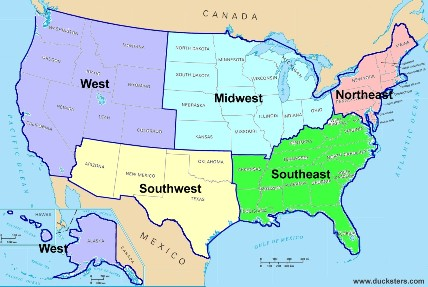

In [39]:
#Image('/path/to/image.jpg')
Image('brewery_regions.png')

In [40]:
micro_brews = brewmaster[brewmaster['Size'] == 'Micro']
medium_brews = brewmaster[brewmaster['Size'] == 'Medium']
large_brews = brewmaster[brewmaster['Size'] == 'Large']
mega_brews = brewmaster[brewmaster['Size'] == 'Mega']
test_brews = brewmaster[brewmaster['Size'] != 'Mega']

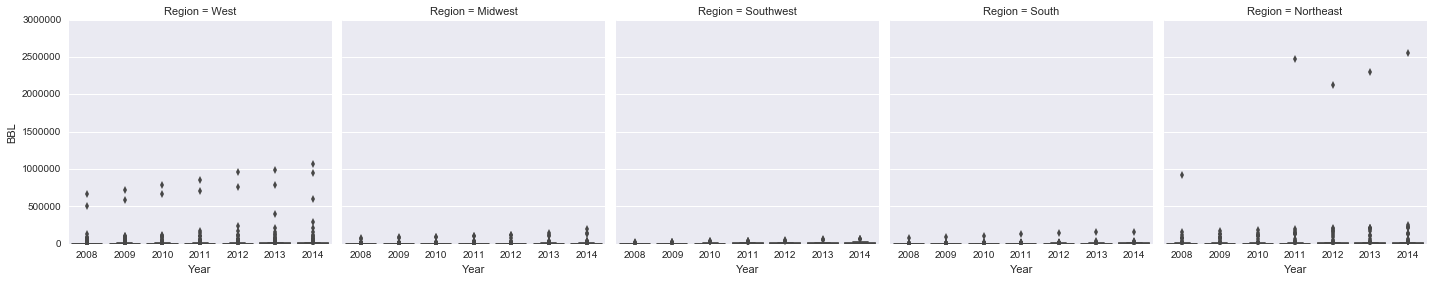

In [41]:
sb.factorplot(x = 'Year', y = 'BBL', data = brewmaster, col = 'Region', kind = 'box')

As the above graphs show, there is such a huge range of BBL between the larger breweries and micro breweries that trying to glance at any regional trends is impossible.  This does allow us to identify that there are several larger breweries in the Northeast and the West that are skewing the data.

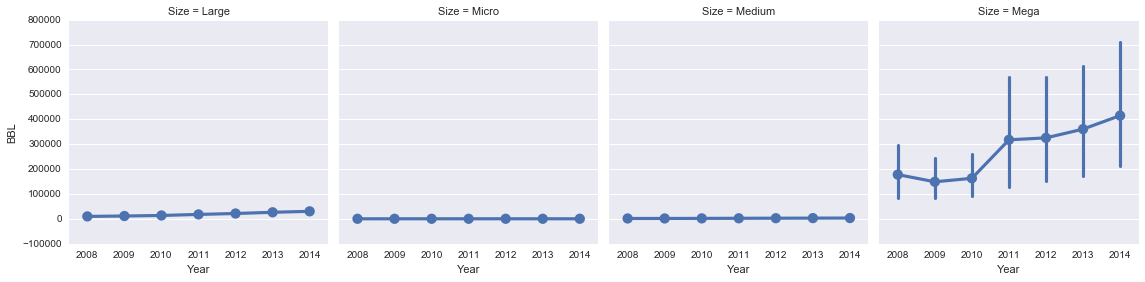

In [42]:
sb.factorplot(x = 'Year', y = 'BBL', data = brewmaster, col = 'Size')

From this perspective, it looks as if there has barely been any growth for smaller breweries.  Even within the 'mega' dataset it looks as if the industry growth is mainly due to the success of a handful of the largest breweries.  Because this is deceptive, I'll be factoring out the 'mega' dataset.  Breweries of this size enjoy significant advantages and ultimately sell very differently than smaller breweries.  Thus, it is fair to treat them as their own unique case study.

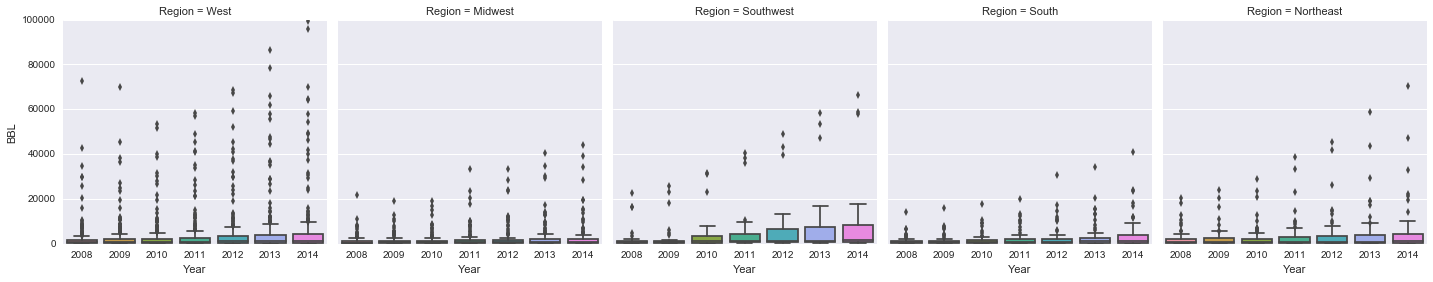

In [43]:
sb.factorplot(x = 'Year', y = 'BBL', data = test_brews, col = 'Region', kind = 'box')

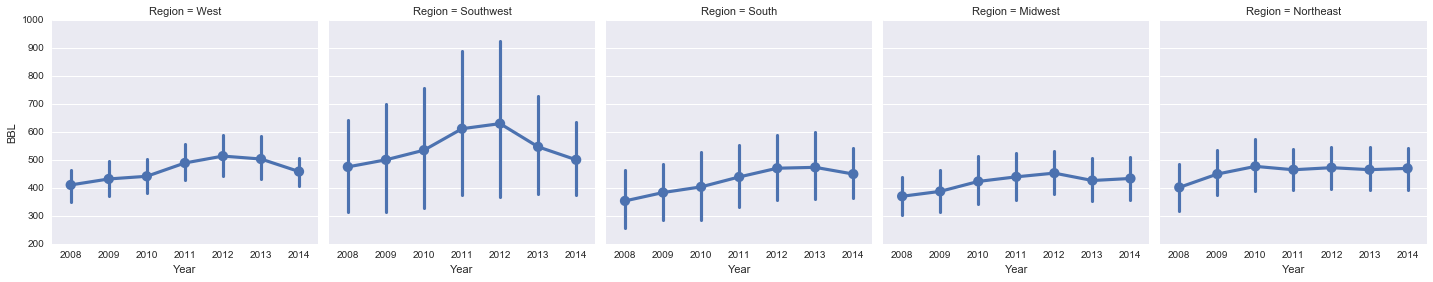

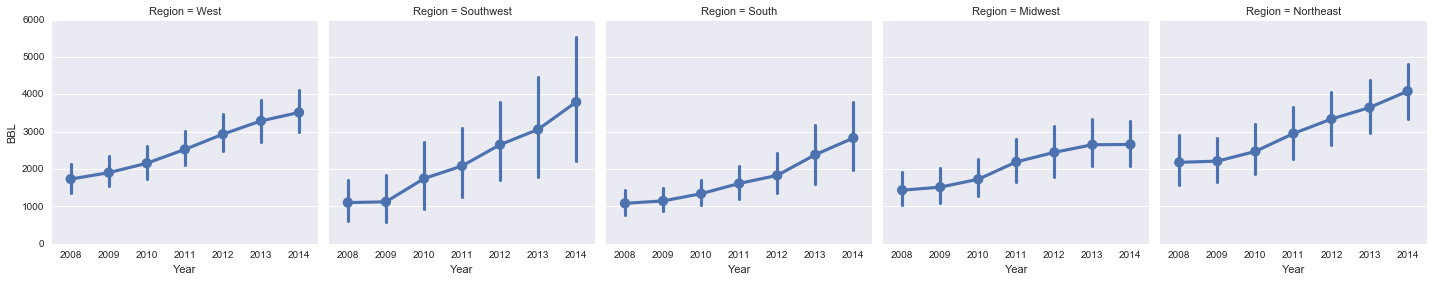

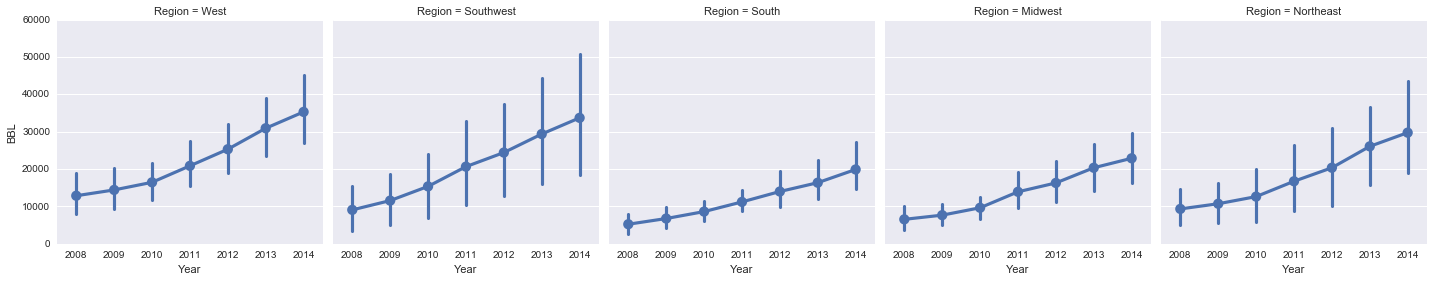

In [44]:
sb.factorplot(x = 'Year', y = 'BBL', data = micro_brews, col = 'Region', col_order = ('West', 'Southwest', 'South', 'Midwest', 'Northeast'))
sb.factorplot(x = 'Year', y = 'BBL', data = medium_brews, col = 'Region', col_order = ('West', 'Southwest', 'South', 'Midwest', 'Northeast'))
sb.factorplot(x = 'Year', y = 'BBL', data = large_brews, col = 'Region', col_order = ('West', 'Southwest', 'South', 'Midwest', 'Northeast'))

### Comparison with income and economic indicators

In order to determine how unique this growth is to the craft beer market, I have compared it against median income per state.  This will demonstrate that craft beer was not simply growing as a result of increasing spending power.

The first set of graphs below demonstrates that there was a decrease in median income across all five regions in the U.S.  This trend began to slow down in 2011 and income slowly began to rise again in the following years.

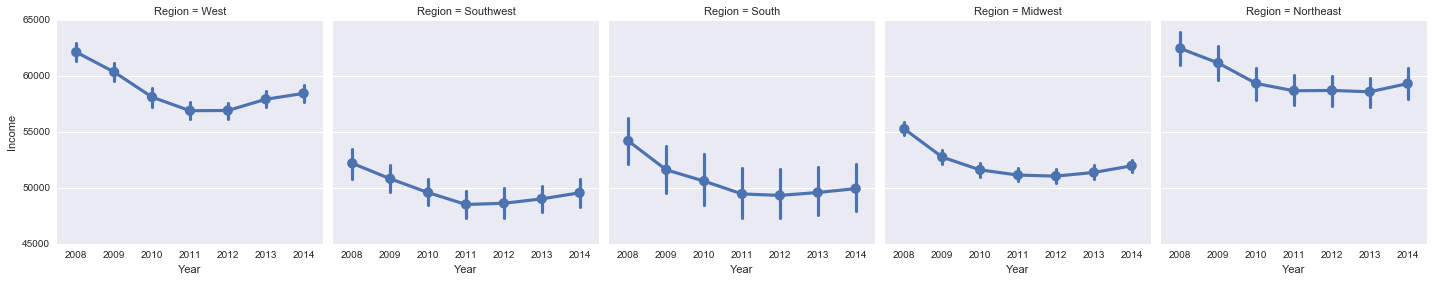

In [45]:
sb.factorplot(x = 'Year', y = 'Income', data = brewmaster, col = 'Region', col_order = ('West', 'Southwest', 'South', 'Midwest', 'Northeast'))

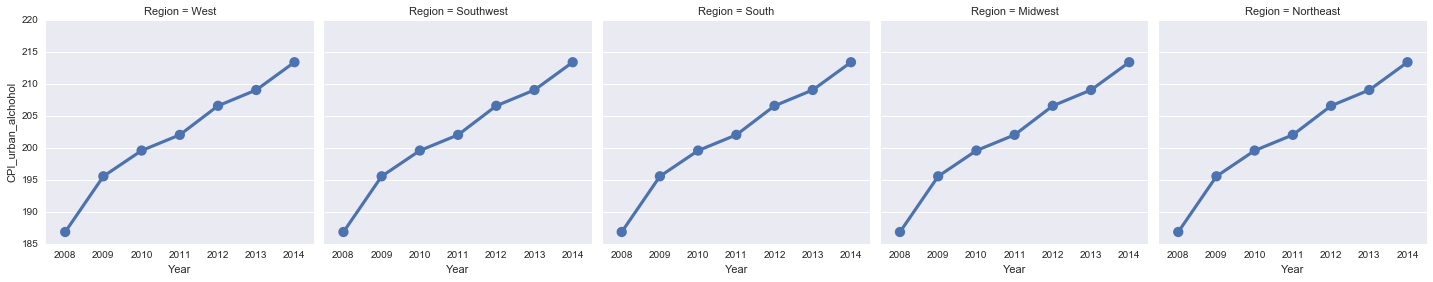

In [46]:
sb.factorplot(x = 'Year', y = 'CPI_urban_alchohol', data = brewmaster, col = 'Region', col_order = ('West', 'Southwest', 'South', 'Midwest', 'Northeast'))

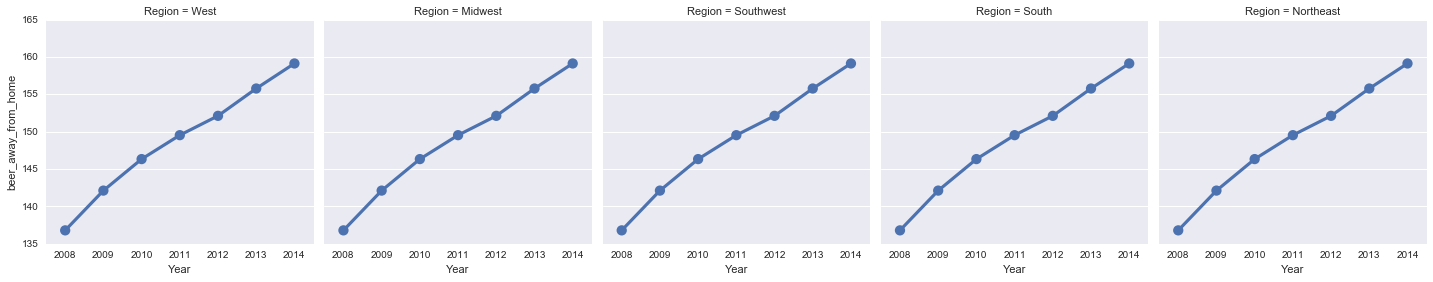

In [47]:
sb.factorplot(x = 'Year', y = 'beer_away_from_home', data = brewmaster, col = 'Region')

Compared to BBL production in micro breweries, median income appears to have no major impact, and in some cases the biggest growth years for BBL are the very years where income was in the most rapid decline.  I selected micro breweries for this example because they are the most vulnerable to rapid shifts in income.

### Factor analysis

Per my problem statement - craft breweries have seen several years of growth, for both large distributors as well as local microbreweries.  And yet, there is clearly still much more room to grow within the market.  There is clearly some degree of balkanization in this growth, with regions like the Southwest showing strange fluctuations for micro-breweries.  

To help understand why this growth occured, and to eventually provide a means of targeting new markets, I will be utilizing a regression analysis to determine if there were underlying market forces that have fueled the interest in craft beer.

Determining consumer habits can be tricky, because there are often more factors in play than any one report can capture.  However, it is my theory that there are several large clues we may be able to determine through careful data analysis.  It is my working theory that the interest in craft beer is fueled by an increase in premiumization combined with interest from the millennial generation.


To show this, I will be conducting a regression analysis on the following against BBL:

-Sales of specialty coffee

-Sales of Wine

-Sales of organic pet food


I chose these three due to data availability, and more importantly because they represent a specific type of consumer preference, namely, more 'authentic' and 'high quality' products.  

For additional demographic analysis, I hypothesize that the single largest factor increasing the interest in craft beer is the 'millenial' generation.  While generations are often difficult to define and distinquish, millenials are largely more interested in craft beer than prior generations.  Correlations with premium products further support this as part of a larger trend towards variety and quality.

Ultimately such a trend is difficult to demonstrate in a single dataset, as individual tastes are almost impossible to measure.  However, we can find ways to compare this.  


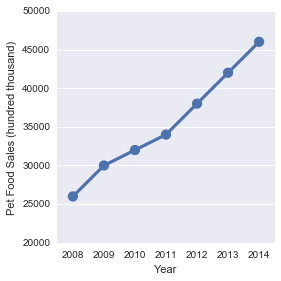

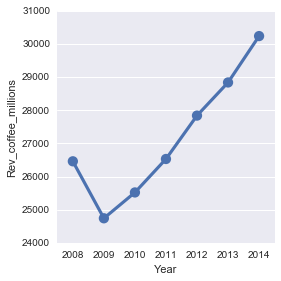

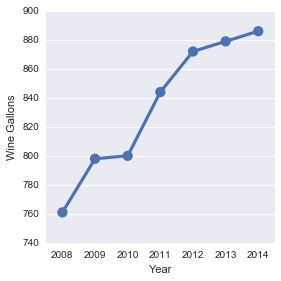

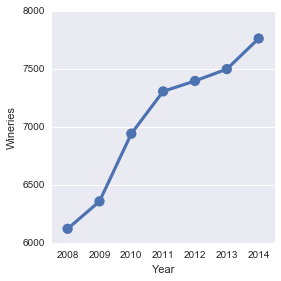

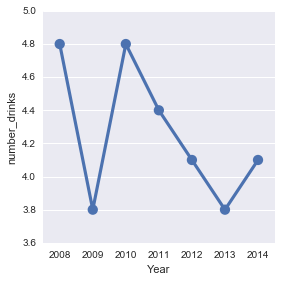

In [48]:
sb.factorplot(x = 'Year', y = 'Pet Food Sales (hundred thousand)', data = brewmaster)
sb.factorplot(x = 'Year', y = 'Rev_coffee_millions', data = brewmaster)
sb.factorplot(x = 'Year', y = 'Wine Gallons', data = brewmaster)
sb.factorplot(x = 'Year', y = 'Wineries', data = brewmaster)
sb.factorplot(x = 'Year', y = 'number_drinks', data = brewmaster)

### Regression Testing / Hypothesis Testing

In [49]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model

In [50]:
test_brews.head()

,Brewery Name,State,BBL,Year,Size,Region,Rev_coffee_millions,Pet Food Sales (hundred thousand),Wine Gallons,Income,CPI_urban_alchohol,beer_away_from_home,beer_relative_importance,number_drinks,Wineries
Date,,,,,,,,,,,,,,,
2014-01-01,10_barrel_brewing,OR,40000,2014,Large,West,30240,46000,886,51134,213.352,159.134,0.274,4.1,7762
2014-01-01,4th_street_brewing,OR,200,2014,Micro,West,30240,46000,886,51134,213.352,159.134,0.274,4.1,7762
2014-01-01,alameda_brewing,OR,2893,2014,Medium,West,30240,46000,886,51134,213.352,159.134,0.274,4.1,7762
2014-01-01,beer_valley_brewing,OR,2050,2014,Medium,West,30240,46000,886,51134,213.352,159.134,0.274,4.1,7762
2014-01-01,bend_brewing,OR,963,2014,Micro,West,30240,46000,886,51134,213.352,159.134,0.274,4.1,7762


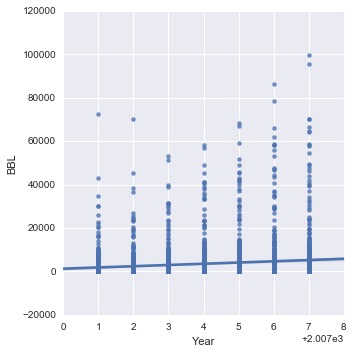

In [51]:
sb.lmplot(x = 'Year', y = 'BBL' , data = test_brews)
sb.plt.show()

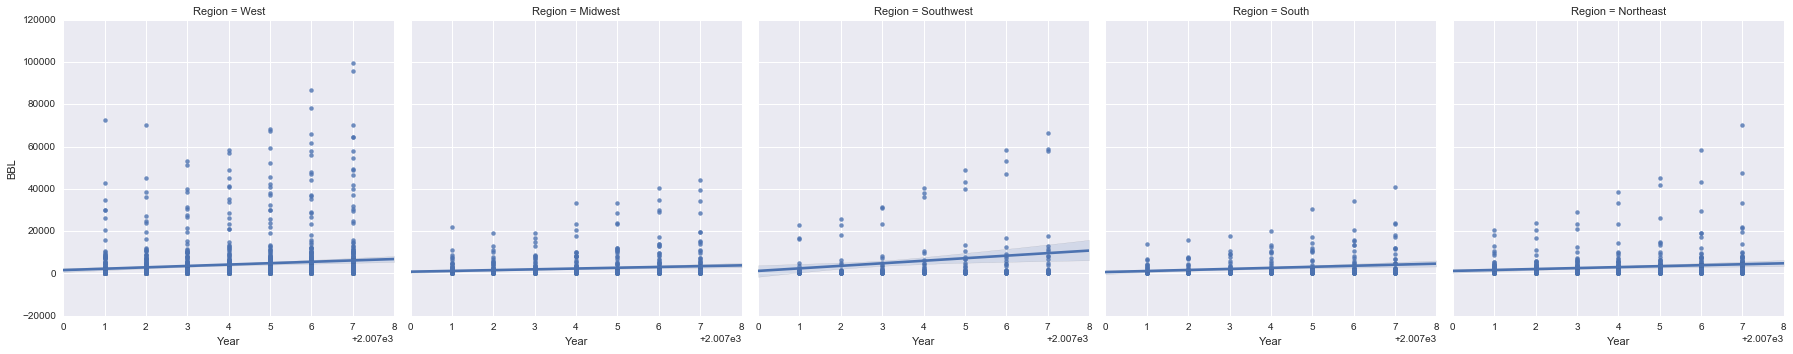

In [52]:
sb.lmplot(x = 'Year', y = 'BBL' , data = test_brews, col = 'Region')
sb.plt.show()

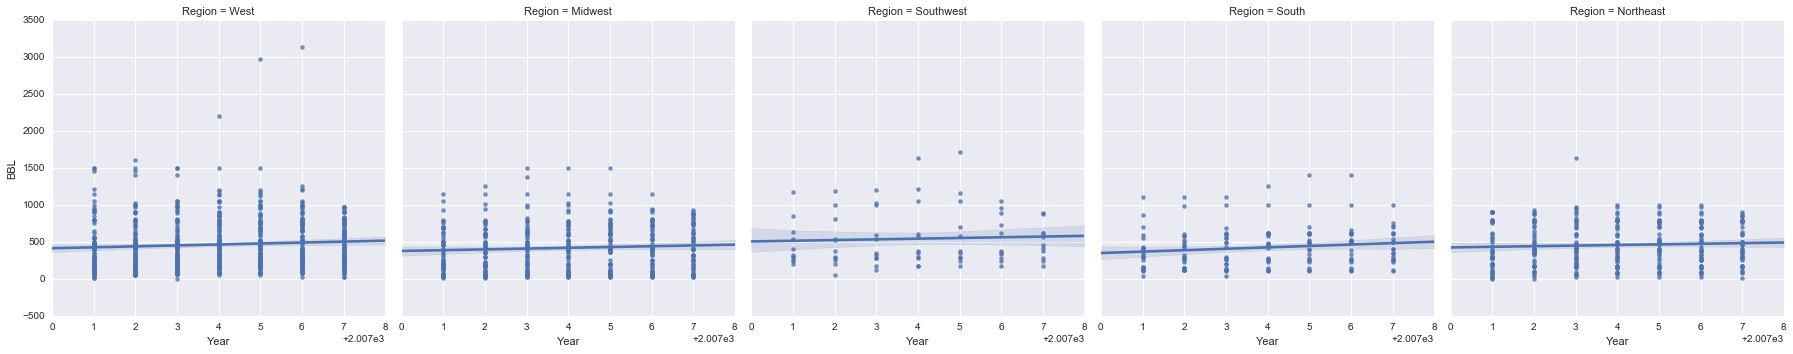

In [53]:
sb.lmplot(x = 'Year', y = 'BBL', data = micro_brews, col = 'Region')
sb.plt.show()

### Testing for coefficients of similar premium products

#### Testing for larger breweries

In [70]:
large_brews.columns = ['Brewery Name', 'State', 'BBL', 'Year', 'Size', 'Region', 'Coffee_Rev','Pet_Food','Wine_gallons','Income','CPI_alcohol','Beer_away','Beer_importance', 'number_drinks', 'Wineries']
micro_brews.columns = ['Brewery Name', 'State', 'BBL', 'Year', 'Size', 'Region', 'Coffee_Rev','Pet_Food','Wine_gallons','Income','CPI_alcohol','Beer_away','Beer_importance', 'number_drinks', 'Wineries']
test_brews.columns = ['Brewery Name', 'State', 'BBL', 'Year', 'Size', 'Region', 'Coffee_Rev','Pet_Food','Wine_gallons','Income','CPI_alcohol','Beer_away','Beer_importance', 'number_drinks', 'Wineries']

In [71]:
test_brews.head()

,Brewery Name,State,BBL,Year,Size,Region,Coffee_Rev,Pet_Food,Wine_gallons,Income,CPI_alcohol,Beer_away,Beer_importance,number_drinks,Wineries
Date,,,,,,,,,,,,,,,
2014-01-01,10_barrel_brewing,OR,40000,2014,Large,West,30240,46000,886,51134,213.352,159.134,0.274,4.1,7762
2014-01-01,4th_street_brewing,OR,200,2014,Micro,West,30240,46000,886,51134,213.352,159.134,0.274,4.1,7762
2014-01-01,alameda_brewing,OR,2893,2014,Medium,West,30240,46000,886,51134,213.352,159.134,0.274,4.1,7762
2014-01-01,beer_valley_brewing,OR,2050,2014,Medium,West,30240,46000,886,51134,213.352,159.134,0.274,4.1,7762
2014-01-01,bend_brewing,OR,963,2014,Micro,West,30240,46000,886,51134,213.352,159.134,0.274,4.1,7762


In [72]:
premium_test = smf.ols(formula = 'BBL ~ Coffee_Rev + Pet_Food + Wineries', data = large_brews).fit()
premium_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BBL   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     30.42
Date:                Wed, 25 Jan 2017   Prob (F-statistic):           6.70e-18
Time:                        20:01:34   Log-Likelihood:                -4966.0
No. Observations:                 448   AIC:                             9940.
Df Residuals:                     444   BIC:                             9956.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -4.569e+04   2.63e+04     -1.737      0.083     -9.74e+04  6006.969
Coffee_Rev     1.0882      0.938      1.160      0.247        -0.756     2.932
Pet_Food       0.7225      0.437      1.655      0.099        -0.136     1.581
Wineries       1.3231      3.702      0.357      0.721        -5.953     8.600
==============================================================================
Omnibus:                      124.994   Durbin-Watson:                   2.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              267.795
Skew:                           1.476   Prob(JB):                     7.06e-59
Kurtosis:                       5.372   Cond. No.                     1.60e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Testing for micro breweries

In [74]:
premium_test = smf.ols(formula = 'BBL ~ Coffee_Rev + Pet_Food + Wineries', data = micro_brews).fit()
premium_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BBL   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     4.472
Date:                Wed, 25 Jan 2017   Prob (F-statistic):            0.00390
Time:                        20:01:45   Log-Likelihood:                -12426.
No. Observations:                1729   AIC:                         2.486e+04
Df Residuals:                    1725   BIC:                         2.488e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    109.3146    270.678      0.404      0.686      -421.577   640.206
Coffee_Rev    -0.0057      0.010     -0.587      0.557        -0.025     0.013
Pet_Food      -0.0017      0.004     -0.378      0.705        -0.011     0.007
Wineries       0.0788      0.038      2.069      0.039         0.004     0.154
==============================================================================
Omnibus:                      544.612   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2639.677
Skew:                           1.412   Prob(JB):                         0.00
Kurtosis:                       8.354   Cond. No.                     1.60e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Testing for coefficients in spending patterns

#### Testing for larger breweries

In [77]:
income_test = smf.ols(formula='BBL ~ Income + CPI_alcohol + Beer_away + Beer_importance + number_drinks', data=large_brews).fit()

income_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BBL   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     19.77
Date:                Wed, 25 Jan 2017   Prob (F-statistic):           8.52e-18
Time:                        20:02:13   Log-Likelihood:                -4962.6
No. Observations:                 448   AIC:                             9937.
Df Residuals:                     442   BIC:                             9962.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept       -1.229e+05   7.18e+04     -1.711      0.088     -2.64e+05  1.82e+04
Income              0.3101      0.107      2.894      0.004         0.100     0.521
CPI_alcohol     -1315.6034    906.129     -1.452      0.147     -3096.459   465.252
Beer_away        2580.3934   1028.705      2.508      0.012       558.633  4602.154
Beer_importance  5.272e+04   9.49e+04      0.556      0.579     -1.34e+05  2.39e+05
number_drinks   -2221.8513   2486.208     -0.894      0.372     -7108.108  2664.406
==============================================================================
Omnibus:                      125.007   Durbin-Watson:                   2.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.036
Skew:                           1.471   Prob(JB):                     2.30e-59
Kurtosis:                       5.411   Cond. No.                     8.55e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
income_test = smf.ols(formula='BBL ~ Income + CPI_alcohol + Beer_away + Beer_importance + number_drinks', data=micro_brews).fit()

income_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BBL   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.389
Date:                Wed, 25 Jan 2017   Prob (F-statistic):            0.00474
Time:                        20:02:47   Log-Likelihood:                -12424.
No. Observations:                1729   AIC:                         2.486e+04
Df Residuals:                    1723   BIC:                         2.489e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept         784.7433    742.606      1.057      0.291      -671.761  2241.248
Income              0.0017      0.001      1.485      0.138        -0.001     0.004
CPI_alcohol         6.8721      9.371      0.733      0.463       -11.507    25.251
Beer_away          -8.6169     10.638     -0.810      0.418       -29.482    12.248
Beer_importance -2122.9758    980.262     -2.166      0.030     -4045.605  -200.347
number_drinks      19.2628     25.702      0.749      0.454       -31.149    69.674
==============================================================================
Omnibus:                      539.798   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2570.588
Skew:                           1.404   Prob(JB):                         0.00
Kurtosis:                       8.272   Cond. No.                     8.54e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression with Standardized Values

In [80]:
brews = pd.read_csv("full_brews.csv")
dogfood = pd.read_csv("Organic Pet Food.csv")
wine = pd.read_csv("Wine Barrels_ts.csv")
coffee = pd.read_csv("Revenue Coffee.csv")
brewery_numbers = pd.read_csv("number_breweries.csv")
cpi_beer = pd.read_csv("cpi_alcohol.csv")
number_drinks = pd.read_csv("number_drinks.csv")
state_income = pd.read_csv("state_income_rows.csv")
regions = pd.read_csv("regions.csv")
wineries = pd.read_csv("Number Wineries.csv")

In [81]:
wineries = wineries.drop('Unnamed: 3',1)

In [82]:
brews = pd.merge(brews, regions)

### Creating Master Data Frame (combining factors)

In [83]:
brewframe = pd.merge(brews, coffee)
brewframe = pd.merge(brewframe, dogfood)
brewframe = pd.merge(brewframe, wine)
brewframe = pd.merge(brewframe, state_income)
brewframe = pd.merge(brewframe, cpi_beer)
brewframe = pd.merge(brewframe, number_drinks)
brewframe = pd.merge(brewframe, wineries)

In [84]:
new_test_brews = brewframe[brewframe['Size'] != 'Mega']

In [85]:
new_test_brews = new_test_brews.drop("Region", axis = 1)

In [86]:
new_test_brews = new_test_brews.drop("Date", axis = 1)

In [87]:
new_test_brews = new_test_brews.drop("State", axis = 1)

In [88]:
new_test_brews = new_test_brews.drop("Size", axis =1)

In [89]:
new_test_brews = new_test_brews.drop("Brewery Name", axis = 1)

In [90]:
new_test_brews = new_test_brews.drop("Year", axis = 1)

In [91]:
new_test_brews.head()

,BBL,Rev_coffee_millions,Pet Food Sales (hundred thousand),Wine Gallons,Income,CPI_urban_alchohol,beer_away_from_home,beer_relative_importance,number_drinks,Wineries
0,40000,30240,46000,886,51134,213.352,159.134,0.274,4.1,7762
1,200,30240,46000,886,51134,213.352,159.134,0.274,4.1,7762
2,2893,30240,46000,886,51134,213.352,159.134,0.274,4.1,7762
3,2050,30240,46000,886,51134,213.352,159.134,0.274,4.1,7762
4,963,30240,46000,886,51134,213.352,159.134,0.274,4.1,7762


In [92]:
from sklearn import preprocessing

BBL_norm = new_test_brews.values 
min_max_scaler = preprocessing.MinMaxScaler()
BBL_scaled = min_max_scaler.fit_transform(BBL_norm)
df = pd.DataFrame(BBL_scaled)

In [93]:
df.columns = ['BBL', 'Coffee_Rev','Pet_Food','Wine_gallons','Income','CPI_alcohol','Beer_away','Beer_importance', 'number_drinks', 'Wineries']

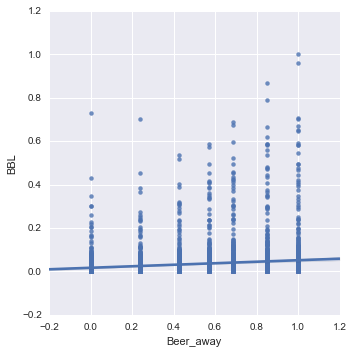

In [95]:
sb.lmplot(x = 'Beer_away', y = 'BBL' , data = df)
sb.plt.show()

In [96]:
income_test = smf.ols(formula='BBL ~ Income + CPI_alcohol + Beer_away + Beer_importance + number_drinks', data=df).fit()

income_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BBL   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     13.71
Date:                Wed, 25 Jan 2017   Prob (F-statistic):           2.73e-13
Time:                        20:03:12   Log-Likelihood:                 3763.4
No. Observations:                3605   AIC:                            -7515.
Df Residuals:                    3599   BIC:                            -7478.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           0.0108      0.010      1.096      0.273        -0.009     0.030
Income              0.0160      0.008      2.033      0.042         0.001     0.031
CPI_alcohol        -0.0546      0.046     -1.191      0.234        -0.144     0.035
Beer_away           0.0902      0.044      2.059      0.040         0.004     0.176
Beer_importance     0.0033      0.009      0.368      0.713        -0.014     0.021
number_drinks      -0.0033      0.005     -0.692      0.489        -0.013     0.006
==============================================================================
Omnibus:                     3581.894   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           156841.642
Skew:                           4.965   Prob(JB):                         0.00
Kurtosis:                      33.750   Cond. No.                         65.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Intepretting results

These tests indicate that their could be some correlation between increased sales of premium goods and the sale of craft beers, particularly for larger breweries.  This could be a result of in-store presence versus microbreweries who require on-site visits.  

There is a similar possible correlation between wine sales and the growth of micro brewery production.  This suggests that consumers view wine more similarly to micro-breweries, who are more often than not based out of a single brewery and likely to house events similar to the wine industry aka tours and tastings.  

However, the analysis also indicates that the selected predictor variables have a very small impact overall.  It's very unlikely that we can put together a complete prediction model for craft beer with a small number of predictors, as consumer behavior is chaotic and difficult to quantify.

What this does allow us to do is to suggest more follow up questions - why are micro breweries facing more competition, particularly in places like the southwest?  Is the biggest obstacle to greater market adoption simply a matter of distribution?  There are also questions and possible follow-up studies to be done in consumer spending, analyzing why CPI for beer increased for beer despite the economic downturn.
